# Data Exploration

The prepared data is ready to be analysed and help us arrive to conclusions about our dataset, allowing for a better understanding of the subject and how it will impact future search system design choices.

Firstly we import all of the relevant packages for the data analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import calendar

In [4]:
ps = pd.read_json("../data/refined/ps_merged_refined.json") #default
psd = pd.read_json("../data/refined/psd_refined.json")
ch = pd.read_json("../data/refined/ch_refined.json")
il = pd.read_json("../data/refined/il_refined.json")


## Webpages and Size

### Number of Webpages per Month per Political Group

In [64]:
def pages_per_month(df):
    group_by_month = df['text'].groupby(by=[df['date'].dt.month])

    pages_per_month = group_by_month.count().reset_index()
    pages_per_month.rename({'date': 'Month', 'text': 'Number of Pages'}, axis='columns', inplace=True)
    pages_per_month['Month'] = pages_per_month['Month'].apply(lambda x: calendar.month_abbr[x])

    return pages_per_month

In [65]:
ps_pages = pages_per_month(ps)
ps_pages 

,Month,Number of Pages
0,Jan,175
1,Feb,240
2,Mar,1985
3,Apr,973
4,May,931
5,Jun,1405
6,Jul,1548
7,Aug,650
8,Sep,1718
9,Oct,1611


In [66]:
psd_pages = pages_per_month(psd)
psd_pages 

,Month,Number of Pages
0,Jan,88
1,Feb,2039
2,Mar,1692
3,Apr,2395
4,May,639
5,Jun,538
6,Jul,1298
7,Aug,1749
8,Sep,204
9,Oct,2606


In [67]:
ch_pages = pages_per_month(ch)
ch_pages 

,Month,Number of Pages
0,Jan,47
1,Feb,36
2,Mar,17
3,Apr,30
4,May,41
5,Jun,84
6,Jul,90
7,Aug,2
8,Sep,7
9,Oct,191


In [68]:
il_pages = pages_per_month(il)
il_pages

,Month,Number of Pages
0,Jan,117
1,Feb,1
2,Mar,513
3,Apr,325
4,May,368
5,Jun,895
6,Jul,610
7,Aug,186
8,Sep,1040
9,Oct,607


#### Plot:

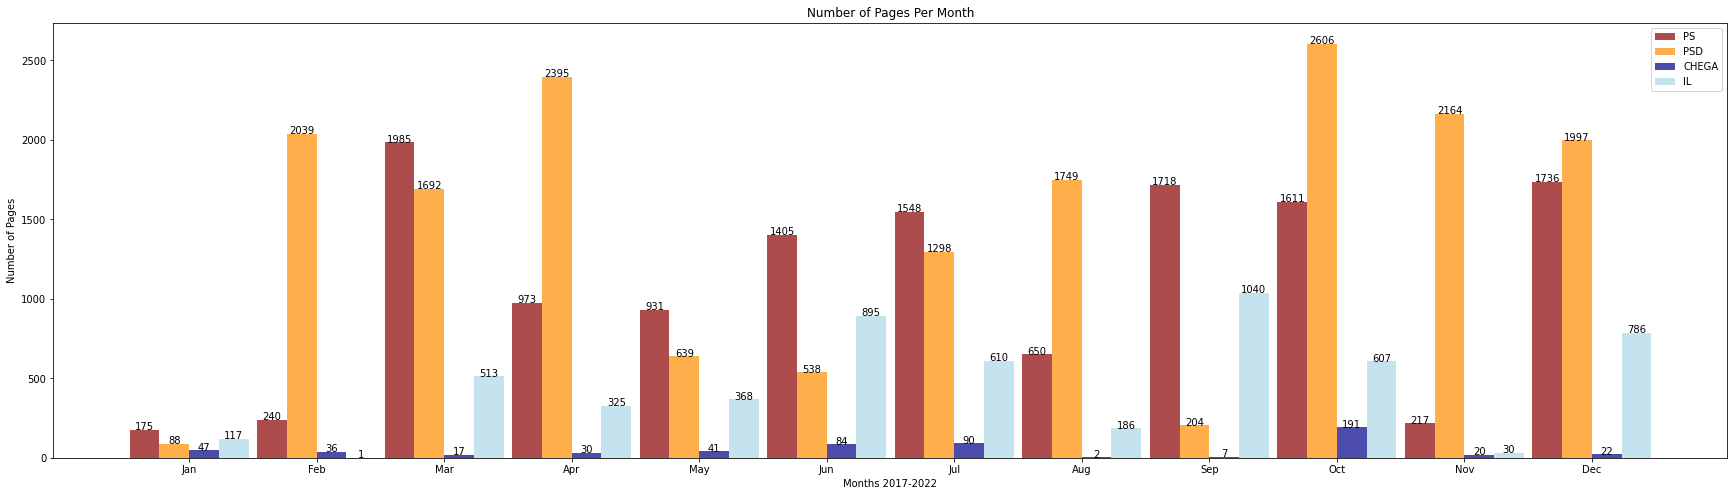

In [69]:
fig, ax = plt.subplots(figsize=(30, 8))
x_axis = np.arange(0,36,3)
width = 0.7

for x, y in enumerate(ps_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x - 3*width/2, y), ha='center')
for x, y in enumerate(psd_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x - width/2, y), ha='center')
for x, y in enumerate(ch_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x + width/2, y), ha='center')
for x, y in enumerate(il_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x + 3*width/2, y), ha='center')

plt.bar(x_axis - 3*width/2, ps_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkred", label='PS')
plt.bar(x_axis - width/2, psd_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkorange", label="PSD")
plt.bar(x_axis + width/2, ch_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkblue", label="CHEGA")
plt.bar(x_axis + 3*width/2, il_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "lightblue", label="IL")

plt.xticks(x_axis, ps_pages['Month'].tolist())
plt.legend(["PS", "PSD", "CHEGA", "IL"])
plt.title('Number of Pages Per Month')
plt.xlabel('Months 2017-2022')
plt.ylabel('Number of Pages')

plt.show()

### Number of Webpages Through Time per Political Groups

In [70]:
def pages_through_time(df, start, end):
    group_by_year = df['text'].groupby(by=[df['date'].dt.year])

    pages_through_time = group_by_year.count().reset_index()
    pages_through_time.rename({'date': 'Year', 'text': 'Number of Pages'}, axis='columns', inplace=True)

    pages_through_time = pages_through_time.merge(how='right', on=['Year'], right = pd.DataFrame({'Year':np.arange(start, end)})).sort_values(by=["Year"]).reset_index().fillna(int(0)).drop(['index'], axis=1)

    return pages_through_time

In [71]:
ps_pages = pages_through_time(ps, 2017, 2022)
ps_pages

,Year,Number of Pages
0,2017,2061
1,2018,2378
2,2019,4967
3,2020,3777
4,2021,6


In [58]:
psd_pages = pages_through_time(psd, 2017, 2022)
psd_pages

,Year,Number of Pages
0,2017,7203
1,2018,4974
2,2019,4668
3,2020,563
4,2021,1


In [59]:
ch_pages = pages_through_time(ch, 2017, 2022)
ch_pages

,Year,Number of Pages
0,2017,0.0
1,2018,0.0
2,2019,457.0
3,2020,130.0
4,2021,0.0


In [60]:
il_pages = pages_through_time(il, 2017, 2022)
il_pages

,Year,Number of Pages
0,2017,300.0
1,2018,877.0
2,2019,2628.0
3,2020,1673.0
4,2021,0.0


#### Bar Plot

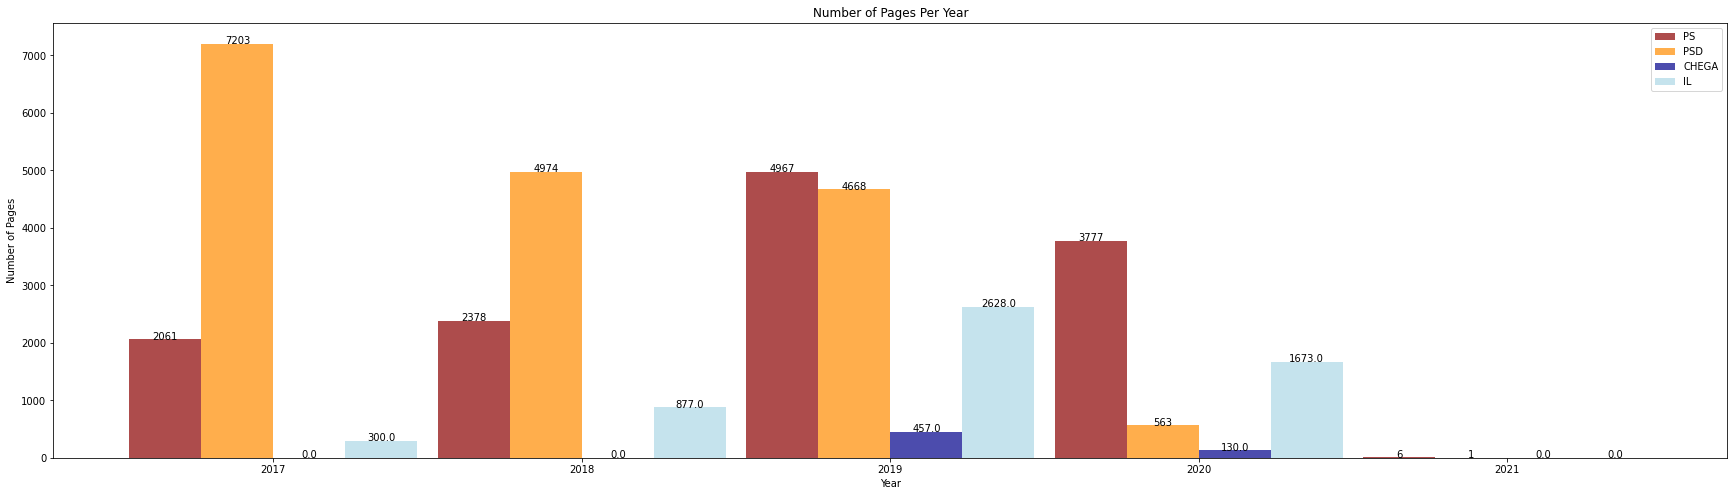

In [61]:
fig, ax = plt.subplots(figsize=(30, 8))
x_axis = np.arange(0,15,3)
width = 0.7

for x, y in enumerate(ps_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x - 3*width/2, y), ha='center')
for x, y in enumerate(psd_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x - width/2, y), ha='center')
for x, y in enumerate(ch_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x + width/2, y), ha='center')
for x, y in enumerate(il_pages['Number of Pages'].tolist()):
     ax.annotate(y, (3 * x + 3*width/2, y), ha='center')

plt.bar(x_axis - 3*width/2, ps_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkred", label='PS')
plt.bar(x_axis - width/2, psd_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkorange", label="PSD")
plt.bar(x_axis + width/2, ch_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "darkblue", label="CHEGA")
plt.bar(x_axis + 3*width/2, il_pages['Number of Pages'].tolist(), width, alpha=0.7, color= "lightblue", label="IL")

plt.xticks(x_axis, ps_pages['Year'].tolist())
plt.legend(["PS", "PSD", "CHEGA", "IL"])
plt.title('Number of Pages Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pages')

plt.show()

#### Line Chart

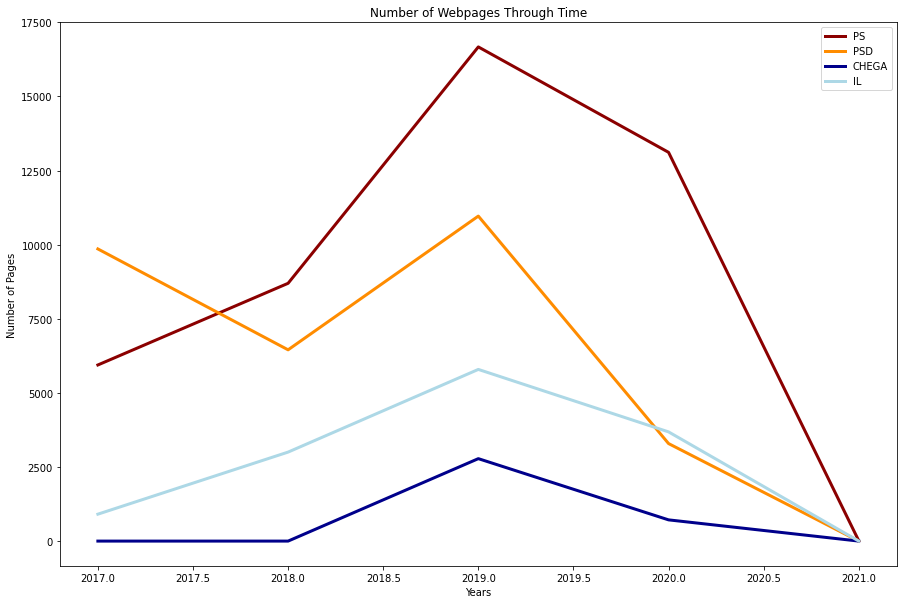

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.title("Number of Webpages Through Time")
plt.ylabel("Number of Pages")
plt.xlabel("Years")

plt.plot(ps_pages['Year'].tolist(), ps_pages['Number of Pages'].tolist(), color="darkred", linewidth=3)
plt.plot(psd_pages['Year'].tolist(), psd_pages['Number of Pages'].tolist(), color="darkorange", linewidth=3)
plt.plot(ch_pages['Year'].tolist(), ch_pages['Number of Pages'].tolist(), color="darkblue", linewidth=3)
plt.plot(il_pages['Year'].tolist(), il_pages['Number of Pages'].tolist(), color="lightblue", linewidth=3)

plt.legend(["PS", "PSD", "CHEGA", "IL"])

plt.show()

### Number of Webpages of all Parties

In [34]:
pages_data = {'Number of Pages': [ps_pages['Number of Pages'].mean(), psd_pages['Number of Pages'].mean(), ch_pages['Number of Pages'].mean(), il_pages['Number of Pages'].mean()],
              'Min': [ps_pages['Number of Pages'].min(), psd_pages['Number of Pages'].min(), ch_pages['Number of Pages'].min(), il_pages['Number of Pages'].min()],
              'Max': [ps_pages['Number of Pages'].max(), psd_pages['Number of Pages'].max(), ch_pages['Number of Pages'].max(), il_pages['Number of Pages'].max()]}
total_pages = pd.DataFrame(pages_data, ['PS', 'PSD', 'CH', 'IL'])
total_pages

,Number of Pages,Min,Max
PS,8886.2,10.0,16670.0
PSD,6112.2,1.0,10963.0
CH,699.4,0.0,2781.0
IL,2677.0,0.0,5791.0


### Length of the Text per Month per Political Group

In [3]:
def length_stats_per_month(df):
    group_by_month = df['text'].groupby(by=[df['date'].dt.month])

    avg_text_lenght_per_month = group_by_month.apply(lambda x: np.mean(x.str.len())).rename('Average')
    min_text_lenght_per_month = group_by_month.apply(lambda x: np.min(x.str.len())).rename('Min')
    max_text_lenght_per_month = group_by_month.apply(lambda x: np.max(x.str.len())).rename('Max')
    std_text_lenght_per_month = group_by_month.apply(lambda x: np.std(x.str.len())).rename('Std')

    text_length_per_month = pd.concat([avg_text_lenght_per_month, min_text_lenght_per_month, max_text_lenght_per_month, std_text_lenght_per_month], axis=1).reset_index()
    text_length_per_month.rename({'date': 'Month'}, axis='columns', inplace=True)
    text_length_per_month['Month'] = text_length_per_month['Month'].apply(lambda x: calendar.month_abbr[x])
    
    return text_length_per_month

In [4]:
ps_length_stats = length_stats_per_month(ps)
ps_length_stats

,Month,Average,Min,Max,Std
0,Jan,20225.531429,1471,735766,101538.177572
1,Feb,3225.779167,36,28423,2356.411229
2,Mar,4426.513854,30,95036,4719.229913
3,Apr,4321.158273,163,38477,3609.879612
4,May,4036.440387,168,77561,4081.496394
5,Jun,5570.830605,101,503713,19823.298762
6,Jul,4637.883721,134,468345,12565.238816
7,Aug,4533.950769,47,38544,3610.126540
8,Sep,4513.625728,42,460179,11683.264145
9,Oct,4149.343886,1,121755,5333.471307


In [5]:
psd_length_stats = length_stats_per_month(psd)
psd_length_stats

,Month,Average,Min,Max,Std
0,Jan,12819.784091,22,377027,50818.182029
1,Feb,4278.246690,503,660777,15504.940744
2,Mar,4641.893617,32,462579,16151.806187
3,Apr,5624.547390,31,1066917,23780.646791
4,May,5005.760563,129,23588,2551.418529
5,Jun,6677.239777,156,327579,21097.565245
6,Jul,7520.464561,52,1142768,40094.647641
7,Aug,4651.084048,151,210462,10684.731556
8,Sep,10469.485294,131,904338,65299.516552
9,Oct,6073.523408,41,1185007,38355.012844


In [6]:
ch_length_stats = length_stats_per_month(ch)
ch_length_stats

,Month,Average,Min,Max,Std
0,Jan,37984.808511,453,151217,62492.886495
1,Feb,32159.138889,120,151528,58615.598796
2,Mar,29583.882353,1911,151440,56381.366872
3,Apr,17706.000000,908,151258,44527.141967
4,May,7307.634146,1277,151343,22850.532906
5,Jun,5340.166667,940,44771,7103.910102
6,Jul,5293.433333,972,44803,6930.527812
7,Aug,2130.000000,959,3301,1171.000000
8,Sep,2042.714286,939,3494,1151.301092
9,Oct,6877.115183,39,153538,19478.218814


In [7]:
il_length_stats = length_stats_per_month(il)
il_length_stats

,Month,Average,Min,Max,Std
0,Jan,6346.000000,221,33631,6907.545761
1,Feb,159.000000,159,159,0.000000
2,Mar,3888.461988,1102,413643,18459.147481
3,Apr,3758.833846,228,57827,3726.813973
4,May,4328.809783,228,89526,7782.648184
5,Jun,3973.916201,219,414410,14927.577819
6,Jul,4664.619672,215,97840,7224.736505
7,Aug,8427.317204,221,122494,12729.808827
8,Sep,4339.840385,221,414435,18482.465718
9,Oct,4274.293245,2,60385,4466.600842


### Length of the Text per Year per Political Group

In [8]:
def length_stats_per_year(df):
    group_by_year = df['text'].groupby(by=[df['date'].dt.year])

    avg_text_lenght_per_year = group_by_year.apply(lambda x: np.mean(x.str.len())).rename('Average')
    min_text_lenght_per_year = group_by_year.apply(lambda x: np.min(x.str.len())).rename('Min')
    max_text_lenght_per_year = group_by_year.apply(lambda x: np.max(x.str.len())).rename('Max')
    std_text_lenght_per_year = group_by_year.apply(lambda x: np.std(x.str.len())).rename('Std')

    text_length_per_year = pd.concat([avg_text_lenght_per_year, min_text_lenght_per_year, max_text_lenght_per_year, std_text_lenght_per_year], axis=1).reset_index()
    text_length_per_year.rename({'date': 'Year'}, axis='columns', inplace=True)
    
    return text_length_per_year

In [9]:
ps_length_stats = length_stats_per_year(ps)
ps_length_stats

,Year,Average,Min,Max,Std
0,2017,5331.978166,1,735766,30181.118156
1,2018,4356.864592,101,77741,3983.056526
2,2019,4461.712704,134,460179,8435.105407
3,2020,4667.332274,174,503713,14268.181520
4,2021,4579.333333,1504,9270,2516.830127


In [10]:
psd_length_stats = length_stats_per_year(psd)
psd_length_stats

,Year,Average,Min,Max,Std
0,2017,4880.572817,15,965958,22963.274988
1,2018,5312.966828,31,1181592,28538.272509
2,2019,5708.051842,22,1185007,20942.570134
3,2020,9715.269982,2,525306,37622.864739
4,2021,309136.000000,309136,309136,0.000000


In [11]:
ch_length_stats = length_stats_per_year(ch)
ch_length_stats

,Year,Average,Min,Max,Std
0,2019,6834.527352,39,153538,19056.800975
1,2020,32016.892308,64,151528,58188.250683


In [12]:
il_length_stats = length_stats_per_year(il)
il_length_stats

,Year,Average,Min,Max,Std
0,2017,3040.966667,25,12521,2620.761810
1,2018,6114.803877,2,60385,4742.766678
2,2019,4359.006469,221,413876,13396.136723
3,2020,4086.918709,64,418327,20395.405836


### Total Length Stats

In [14]:
length_data = {'Length': [ps_length_stats['Average'].mean(), psd_length_stats['Average'].mean(), ch_length_stats['Average'].mean(), il_length_stats['Average'].mean()],
                'Min': [ps_length_stats['Min'].min(), psd_length_stats['Min'].min(), ch_length_stats['Min'].min(), il_length_stats['Min'].min()],
                'Max': [ps_length_stats['Max'].max(), psd_length_stats['Max'].max(), ch_length_stats['Max'].max(), il_length_stats['Max'].max()]}
total_length = pd.DataFrame(length_data, ['PS', 'PSD', 'CH', 'IL'])
total_length

,Length,Min,Max
PS,4679.444214,1,735766
PSD,66950.572294,2,1185007
CH,19425.709830,39,153538
IL,4400.423930,2,418327


## Wordcloud

In [2]:
def wordcloud_setup(df):
    stop = stopwords.words('portuguese') + ["ser","quer","se","sobre","toda","assim","sendo"]

    wordcloud_text=df["text"].str.replace("[$&+-:;“”=?@#|'<>.^*()%!,\"\/]"," ",regex=True)
    wordcloud_text=wordcloud_text.str.replace("\d","",regex=True)
    wordcloud_text=wordcloud_text.str.replace(" +"," ",regex=True)


    df_without_stopwords=" ".join(wordcloud_text)
    df_without_stopwords=' '.join([word.lower() for word in df_without_stopwords.split(" ") if word.lower() not in (stop)])

    return df_without_stopwords

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(df_without_stopwords):
    wordcloud = WordCloud(width=800, height=400,collocations=False).generate(df_without_stopwords)

    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

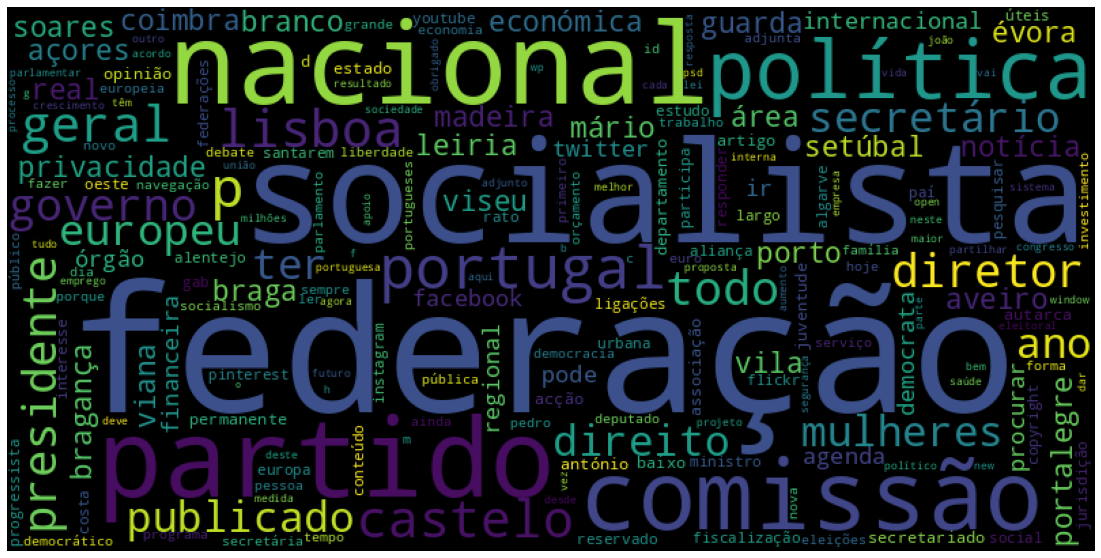

In [79]:
ps_no_stopwords = wordcloud_setup(ps)
plot_wordcloud(ps_no_stopwords)

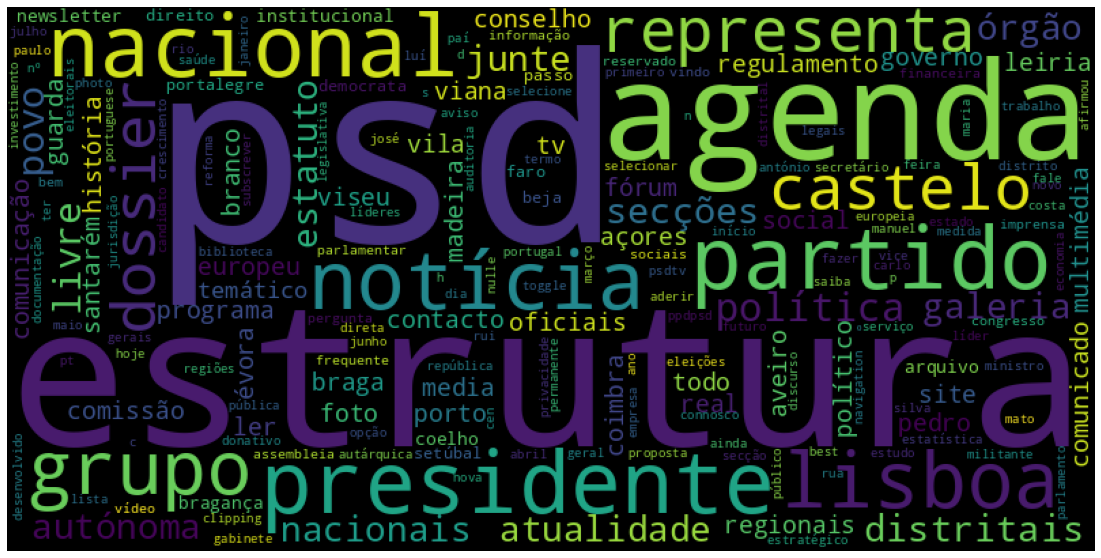

In [8]:
psd_no_stopwords = wordcloud_setup(psd)
plot_wordcloud(psd_no_stopwords)

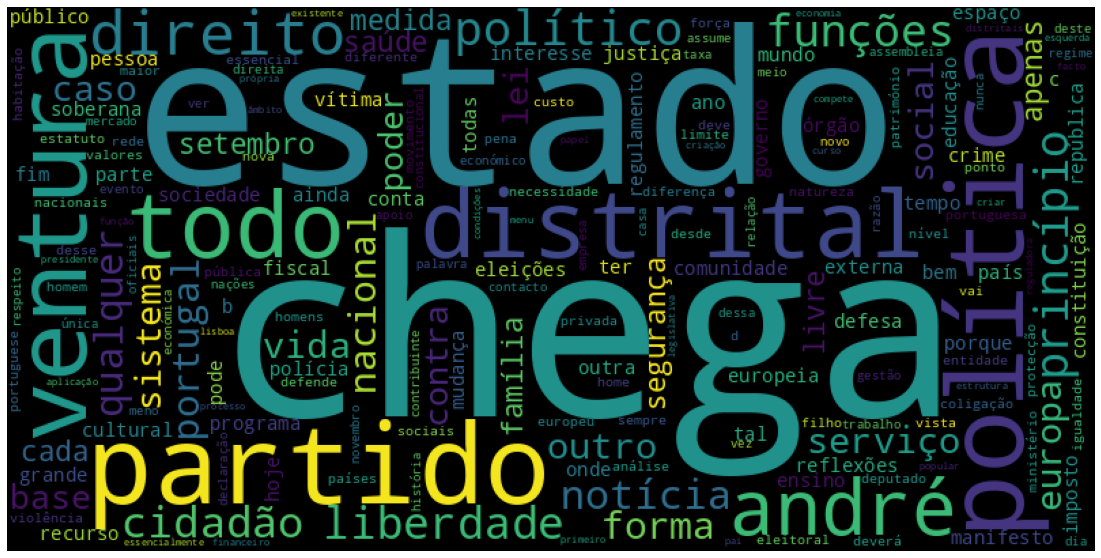

In [9]:
ch_no_stopwords = wordcloud_setup(ch)
plot_wordcloud(ch_no_stopwords)

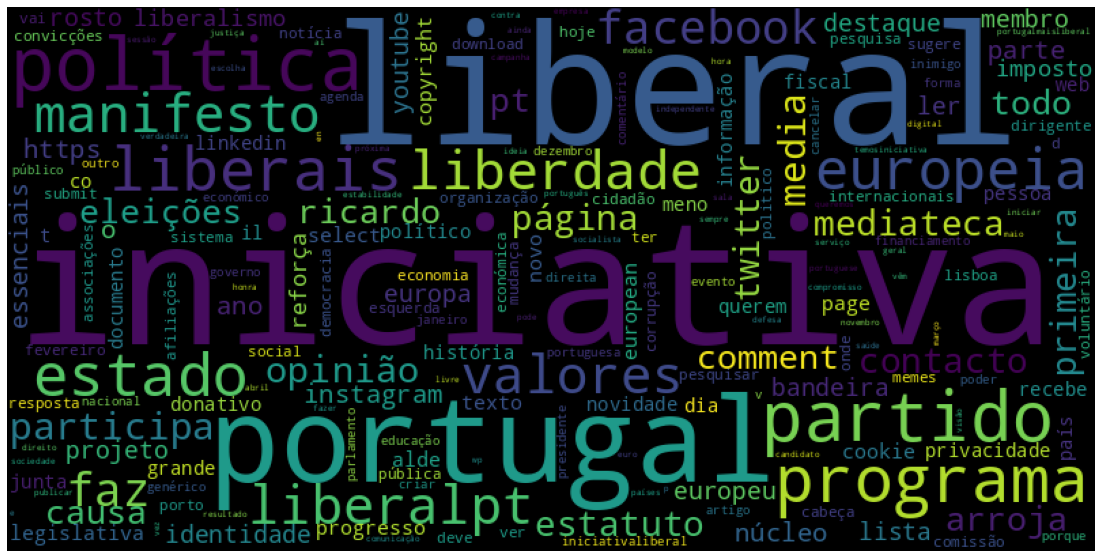

In [10]:
il_no_stopwords = wordcloud_setup(il)
plot_wordcloud(il_no_stopwords)

## Frequency of mentions of other political groups in each one

In [9]:
from queue import Empty


def political_groups_frequency(df, groups):
    
    df["text"] = df['text'].str.lower().str.replace(r'[^\w\s]','',regex=True)
 
    word_frequency = df.text.str.split().explode().value_counts().reset_index()
    
    word_frequency.columns = ['Word', 'Frequency'] 
    
    frequency0 = word_frequency.loc[word_frequency['Word'].str.contains("^" + groups[0] + "$", case=False)]
    frequency1 = word_frequency.loc[word_frequency['Word'].str.contains("^" + groups[1] + "$", case=True)]
    frequency2 = word_frequency.loc[word_frequency['Word'].str.contains("^" + groups[2] + "$", case=True)]  


    if(frequency0.empty):  
        final_frequence0 = 0
        final_frequence1 = frequency1.iloc[0]["Frequency"]
        final_frequence2 = frequency2.iloc[0]["Frequency"]
    elif(frequency1.empty):
        final_frequence0 = frequency0.iloc[0]["Frequency"]
        final_frequence1 = 0
        final_frequence2 = frequency2.iloc[0]["Frequency"]
    elif(frequency2.empty):
        final_frequence0 = frequency0.iloc[0]["Frequency"]
        final_frequence1 = frequency1.iloc[0]["Frequency"]
        final_frequence2 = 0
    else:
        final_frequence0 = frequency0.iloc[0]["Frequency"]
        final_frequence1 = frequency1.iloc[0]["Frequency"]
        final_frequence2 = frequency2.iloc[0]["Frequency"]

    return [final_frequence0, final_frequence1, final_frequence2]

### Frequencies

In [14]:
ch_frequency = political_groups_frequency(ch,['ps','psd','il'])
ps_frequency = political_groups_frequency(ps,['psd','il','chega'])
psd_frequency = political_groups_frequency(psd,['ps','il','chega'])
il_frequency = political_groups_frequency(il,['ps','psd','chega'])


## Pie Chart of the frequency of mentions

In [15]:
def pie_chart_build(groups, data):
    # Creating dataset
    # political_groups = ['PS', 'PSD', 'IL']
    
    # data = [ps_frequency_ch.iloc[0]["Frequency"], psd_frequency_ch.iloc[0]["Frequency"],il_frequency_ch.iloc[0]["Frequency"]]
    
    # Creating plot
    # Creating explode data
    explode = (0.1, 0.0, 0.2)
    
    # Creating color parameters
    colors = ( "orange", "cyan", "indigo")
    
    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
    
    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    
    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                    autopct = lambda pct: func(pct, data),
                                    explode = explode,
                                    labels = groups,
                                    shadow = True,
                                    colors = colors,
                                    startangle = 90,
                                    wedgeprops = wp,
                                    textprops = dict(color ="black"))
    
    # Adding legend
    ax.legend(wedges, groups,
            title ="Political Groups",
            loc ="center left",
            bbox_to_anchor =(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size = 12, weight ="bold")
    # ax.set_title("Customizing pie chart")
    
    # show plot
    plt.show()

### PS pie chart

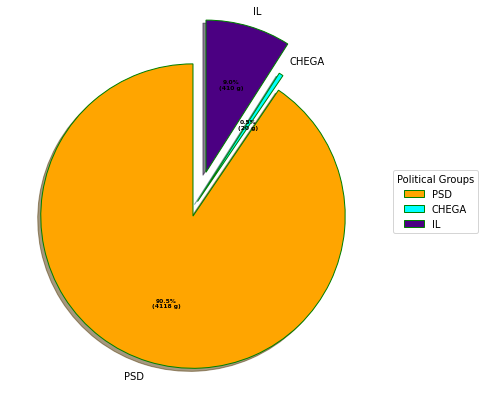

In [18]:
pie_chart_build(['PSD', 'CHEGA', 'IL'],ps_frequency )

### PSD pie chart

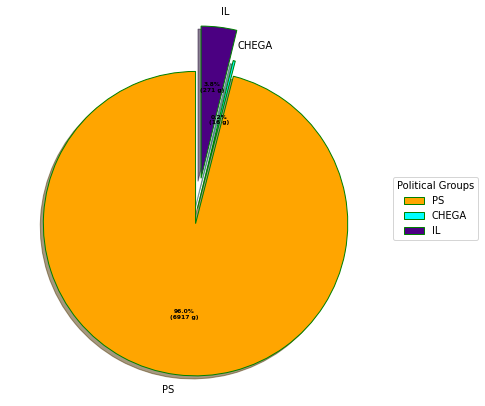

In [19]:
pie_chart_build(['PS', 'CHEGA', 'IL'],psd_frequency )

### Chega's pie chart

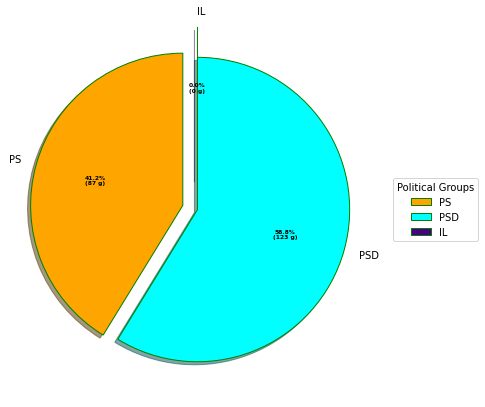

In [16]:
pie_chart_build(['PS', 'PSD', 'IL'],ch_frequency )

### IL's pie chart

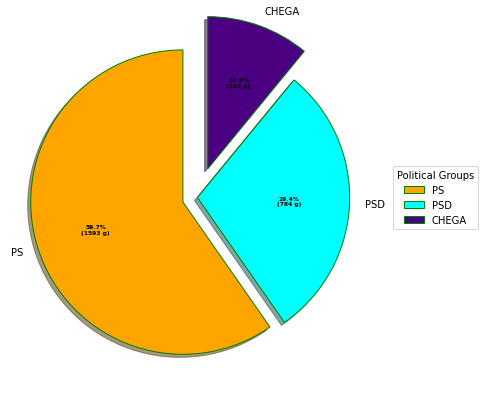

In [17]:
pie_chart_build(['PS', 'PSD', 'CHEGA'], il_frequency )